# Before Deep Learning: a Brief History of Machine Learning

This notebook explores the history of machine learning before the rise of deep learning, covering key concepts and algorithms that paved the way for modern AI.

The following topics have been covered:
* Probabilistic modeling
* Early neural networks
* Kernel methods
* Decision trees, random forests, and gradient boosting machines
* Back to neural networks
* What makes deep learning different
* The modern machine-learning landscape




## 1. Probabilistic Modeling

Probabilistic models use probability theory to make predictions. They model the underlying data distribution to understand the likelihood of different outcomes.

### Key Concepts:

*   **Bayes' Theorem:** A fundamental theorem describing how to update the probability of a hypothesis based on new evidence.
*   **Generative Models:** Models that learn the joint probability distribution of the data and the labels.
*   **Discriminative Models:** Models that directly learn the conditional probability of the labels given the data.

### Common Algorithms:

*   Naive Bayes
*   Gaussian Mixture Models (GMMs)
*   Hidden Markov Models (HMMs)

### Example: Naive Bayes Classifier

Accuracy: 0.95


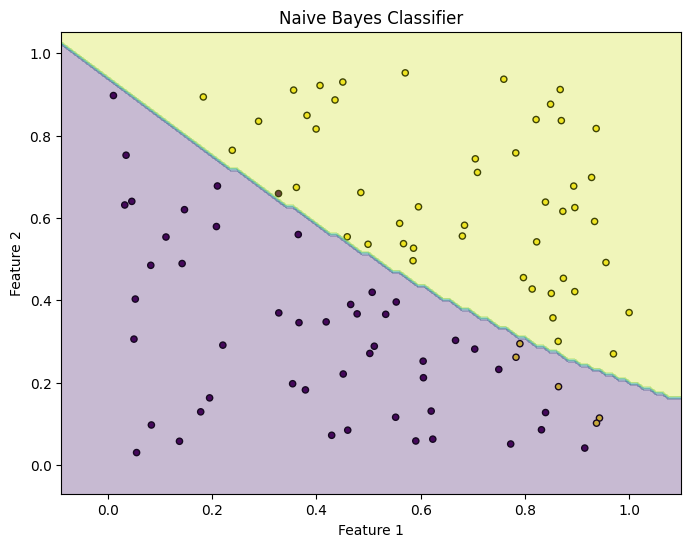

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int) # Simple classification rule

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the data and decision boundary (simplified for 2D)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')

# Create a meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 2. Early Neural Networks

Early neural networks were inspired by the structure of the human brain. They consisted of layers of interconnected nodes (neurons) that processed information.

### Key Concepts:

*   **Perceptron:** A simple linear binary classifier.
*   **Activation Functions:** Non-linear functions applied to the output of neurons.
*   **Backpropagation:** An algorithm for training multi-layer neural networks by calculating the gradient of the loss function.

### Common Architectures:

*   Single-layer Perceptrons
*   Multi-layer Perceptrons (MLPs)

### Example: Single-layer Perceptron

Predictions: [0 0 0 1]


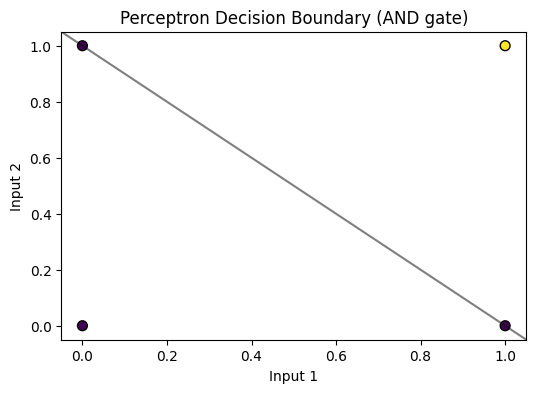

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (linearly separable)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]) # AND gate

# Train Perceptron
model = Perceptron()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print(f"Predictions: {predictions}")

# Visualize the data and decision boundary
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.title("Perceptron Decision Boundary (AND gate)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()

## 3. Kernel Methods

Kernel methods use kernel functions to implicitly map data into a higher-dimensional space, where linear models can be applied. This allows for learning non-linear decision boundaries.

### Key Concepts:

*   **Kernel Trick:** Using kernel functions to avoid explicitly computing the coordinates of data in the higher-dimensional space.
*   **Support Vector Machines (SVMs):** A powerful classification algorithm that finds the optimal hyperplane to separate data points.
*   **Kernel Functions:** Functions that calculate the dot product of data points in the higher-dimensional space (e.g., RBF kernel, polynomial kernel).

### Common Algorithms:

*   Support Vector Machines (SVMs)
*   Kernel Principal Component Analysis (KPCA)

### Example: SVM with RBF Kernel

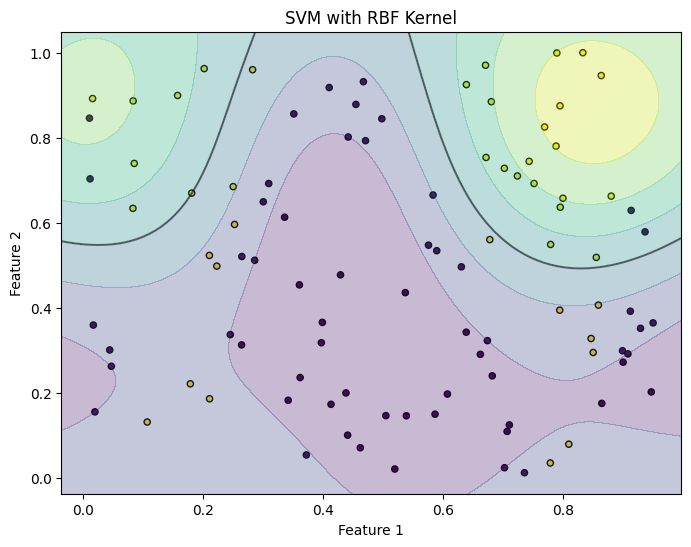

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Generate some non-linearly separable data
X = np.random.rand(100, 2)
y = (np.sin(X[:, 0] * 10) + X[:, 1] > 1).astype(int)

# Train SVM with RBF kernel
model = SVC(kernel='rbf')
model.fit(X, y)

# Plot the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contourf(XX, YY, Z, cmap='viridis', alpha=0.3)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 4. Decision Trees, Random Forests, and Gradient Boosting Machines

These algorithms are based on tree-like structures that make decisions by splitting data based on features.

### Key Concepts:

*   **Decision Tree:** A tree structure where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label.
*   **Ensemble Methods:** Combining multiple models to improve performance.
*   **Random Forest:** An ensemble of decision trees trained on random subsets of the data and features.
*   **Gradient Boosting Machines (GBMs):** An ensemble method that builds trees sequentially, with each new tree correcting the errors of the previous ones.

### Common Algorithms:

*   Decision Trees
*   Random Forests
*   Gradient Boosting (e.g., AdaBoost, Gradient Boosting Trees, XGBoost, LightGBM)

### Example: Random Forest Classifier

Predictions for new data: [0 0]


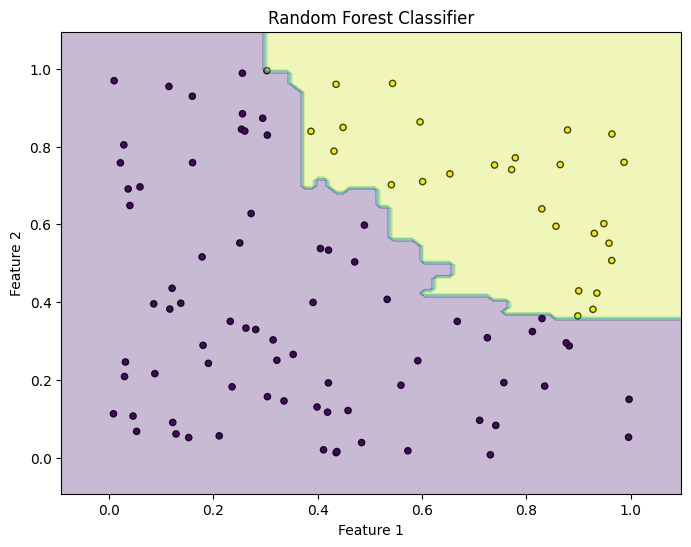

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
X = np.random.rand(100, 2)
y = (X[:, 0] * X[:, 1] > 0.3).astype(int)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions (example with new data)
new_data = np.array([[0.5, 0.5], [0.1, 0.9]])
predictions = model.predict(new_data)
print(f"Predictions for new data: {predictions}")

# Visualize the data and decision boundary (simplified)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')

# Create a meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Random Forest Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 5. Back to Neural Networks

After a period where other methods were more prominent, neural networks saw a resurgence due to advancements in computing power, data availability, and training techniques.

### Key Concepts:

*   **Hidden Layers:** Layers between the input and output layers that learn complex representations of the data.
*   **Non-linear Activation Functions:** Essential for learning complex patterns.
*   **Training with Backpropagation:** Efficiently updating the weights of the network.

### Advances Leading to Resurgence:

*   Availability of larger datasets
*   Increased computational power (GPUs)
*   Improved optimization algorithms

## 6. What Makes Deep Learning Different

Deep learning is a subfield of machine learning that uses artificial neural networks with multiple layers (deep neural networks).

### Key Differences:

*   **Depth of Network:** Deep learning models have significantly more layers than early neural networks.
*   **Automatic Feature Extraction:** Deep networks can automatically learn hierarchical representations of the data, eliminating the need for manual feature engineering.
*   **Handling of Complex Data:** Deep learning excels at processing complex data like images, audio, and text.

### Key Technologies:

*   Convolutional Neural Networks (CNNs) for image data
*   Recurrent Neural Networks (RNNs) for sequential data
*   Transformers for sequence-to-sequence tasks

## 7. The Modern Machine-Learning Landscape

The modern machine-learning landscape is diverse, with deep learning playing a dominant role in many areas, but traditional methods still valuable for specific tasks.

### Key Trends:

*   **End-to-end Learning:** Training models to perform a task directly from raw input to desired output.
*   **Transfer Learning:** Using pre-trained models on new tasks.
*   **Explainable AI (XAI):** Developing methods to understand how AI models make predictions.
*   **MLOps:** Practices for deploying and managing machine learning models in production.

### Continued Importance of Traditional Methods:

*   Interpretability
*   Smaller datasets
*   Specific problem domains where they outperform deep learning

## Summary and Conclusion

### Summary

*   This notebook explored the history of machine learning before deep learning.
*   Key topics covered include probabilistic models, early neural networks, kernel methods, and tree-based ensemble methods.
*   These methods provided foundational concepts for modern machine learning.
*   Traditional methods are still valuable for specific tasks, such as when interpretability is needed or with smaller datasets.
*   The resurgence of neural networks, driven by advancements in computing power and data, led to deep learning.

### Conclusion

*   Deep learning, with its multi-layered networks, excels at automatic feature extraction and handling complex data.
*   Key deep learning technologies include CNNs, RNNs, and Transformers.
*   The modern ML landscape is diverse, with deep learning being dominant in many areas.
*   Important trends include end-to-end learning, transfer learning, explainable AI, and MLOps.
*   Understanding traditional methods and historical context is essential for navigating the current ML landscape.